Kütüphanelerin İçeri Alınması

In [ ]:
!pip install tweepy
!pip install wordcloud
!pip install numpy
!pip install pandas
!pip install pillow
!pip install matplotlib
!pip install transformers
!pip install nest-asyncio
from google.colab import files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.0 MB/s eta 0:00:00


In [ ]:
import tweepy
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore') # hata uyarıları görmezden gelmek
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
import seaborn as sns
from scipy import stats
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification
from pandas import Series, DataFrame
import nest_asyncio
nest_asyncio.apply()
import re
from textblob import TextBlob
#uploaded = files.upload()

Twitter API Ayarlarının Yapılması

In [ ]:

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret =''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

  TOGG anahtar kelimesindeki tweetlerin çekilmesi

In [ ]:
tweets_list = []
text_query = 'togg'
count = 1200

for tweet in api.search_tweets(q=text_query, count=count, lang='tr-tr'):
    tweets_list.append((tweet.created_at,tweet.id,tweet.text))
tweets = pd.DataFrame(tweets_list, columns=["Tarih",'Tweet_id','Text'])

In [ ]:
df_Tweets = pd.DataFrame(tweets)
TweetSayisi = len(df_Tweets)
print("Tweet Sayısı: ",TweetSayisi)
df_Tweets

Tweet Sayısı:  0


""


In [ ]:
df_Tweets.to_csv("twitter.csv")
csvokunan = pd.read_csv("twitter.csv",encoding = 'UTF8')
csvokunan.to_excel("twitter.xlsx")
os.remove("twitter.csv")

In [ ]:
#noktalama işaretleri
df_Tweets["Text"] = df_Tweets["Text"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["Text"]= df_Tweets["Text"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["Text"]= df_Tweets["Text"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["Text"] =df_Tweets["Text"].str.replace('http\S+','')
df_Tweets["Text"]= df_Tweets["Text"].str.replace('\n','')
df_Tweets["Text"]= df_Tweets["Text"].str.lower()


In [ ]:
df_Tweets["Text"]

0     rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
1     rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
2     rt aksam sanayi ve teknoloji bakanı mehmet fat...
3     rt jchadensis hakkı alkan togg sürerken boşalı...
4     rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
                            ...                        
95    rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
96    mstfmstfylmz mfatihkacir sezgiays toggu sadece...
97    rt tr_hbr  bakan kırmızı plakayı toggdan söktü...
98    rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
99    rt mfatihkacir türkiyenin ilk yüksek çözünürlü...
Name: Text, Length: 100, dtype: object

In [ ]:
word = "".join(review for review in df_Tweets.Text)
print("There are {} words in the combination of all review.".format(len(word)))

There are 12407 words in the combination of all review.


Kök bulma işleminden sonra Wordcloud

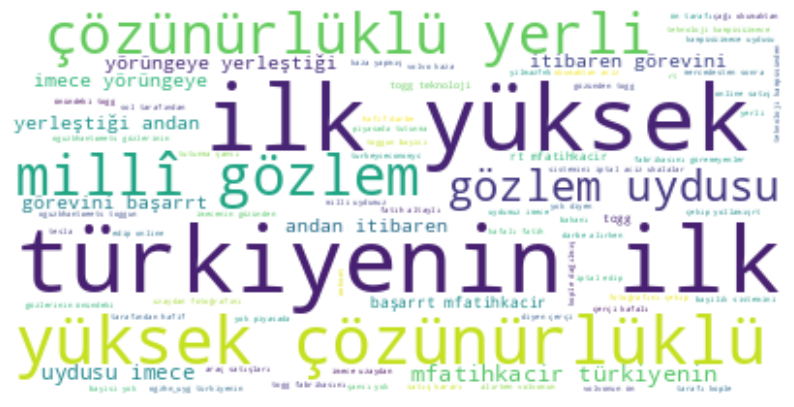

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["ben","sen","de","da","k,","ve","bir","ile","için","bu","ne","gibi","çünkü"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(word)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

Eğitilmiş BERT Modeli Kullanarak Duygu Analizinin Yapılması

In [ ]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")


In [ ]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:

code_to_label={
 'positive': 'pozitif',
 'negative': 'negatif',
    'notr': 'notr'

}

In [ ]:
Tweet = list(df_Tweets['Text'])
Tweet

['rt mfatihkacir türkiyenin ilk yüksek çözünürlüklü yerli ve millî gözlem uydusu imece yörüngeye yerleştiği andan itibaren görevini başar',
 'rt mfatihkacir türkiyenin ilk yüksek çözünürlüklü yerli ve millî gözlem uydusu imece yörüngeye yerleştiği andan itibaren görevini başar',
 'rt aksam sanayi ve teknoloji bakanı mehmet fatih kacır imecenin togg teknoloji kampüsünden aldığı bir görüntüyü paylaştı',
 'rt jchadensis hakkı alkan togg sürerken boşalıyor ',
 'rt mfatihkacir türkiyenin ilk yüksek çözünürlüklü yerli ve millî gözlem uydusu imece yörüngeye yerleştiği andan itibaren görevini başar',
 'rt nevsehir_bel bizimkisi bir togg hikayesi togg kapadokya iyibayramlar ',
 'lerkomitesi reis yalıçapkını\xa0 hzisa\xa0 tekdinislam türkislambirliğiboey dilan polat the last dance soğan g ',
 'rt mfatihkacir türkiyenin ilk yüksek çözünürlüklü yerli ve millî gözlem uydusu imece yörüngeye yerleştiği andan itibaren görevini başar',
 'rt mfatihkacir türkiyenin ilk yüksek çözünürlüklü yerli ve millî 

In [ ]:
f = list()
n = list()
for i in range(TweetSayisi):
    a = analysis(Tweet[i])
    b = code_to_label[a[0]['label']]
    c = a[0]['score']
    f.append(b)
    n.append(c)

In [ ]:
f

['pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'negatif',
 'negatif',
 'pozitif',
 'pozitif',
 'negatif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'negatif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'negatif',
 'negatif',
 'pozitif',
 'negatif',
 'negatif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'ne

In [ ]:
df_Tweets["Tweets_Duygu"] = pd.DataFrame(f)
df_Tweets
df_Tweets["Tweets_Duygu"].value_counts()


pozitif    77
negatif    23
Name: Tweets_Duygu, dtype: int64

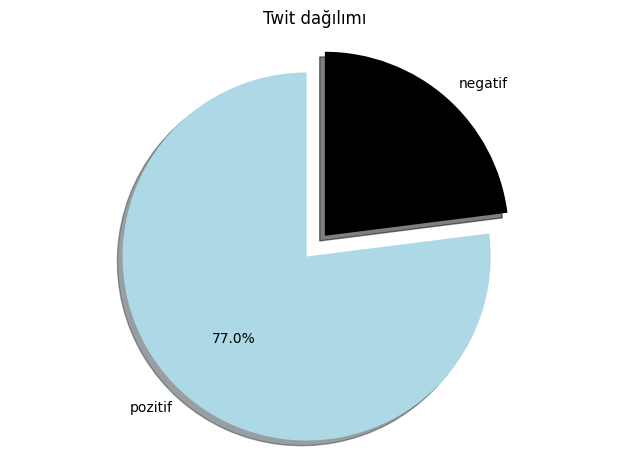

In [ ]:
import matplotlib.pyplot as plt

# Duygu sayılarını hesaplayın
pozitif = (df_Tweets['Tweets_Duygu'] == 'pozitif').sum()
negatif = (df_Tweets['Tweets_Duygu'] == 'negatif').sum()

# Duygu oranlarını oluşturun
proportions = [pozitif, negatif]

# Pasta grafiği oluşturun
plt.pie(
    # oranları kullanarak
    proportions,

    # etiketler olarak duygu adları
    labels=['pozitif', 'negatif'],

    # gölgeler olmadan
    shadow=0.9,

    # renklerle
    colors=['lightblue', 'black'],

    # bir dilim dışarı çıkartarak
    explode=(0.15, 0),

    # başlangıç açısı %90 olsun
    startangle=90,

    # yüzdeyi ondalık olarak göster
    autopct='%1.1f%%'
)

# Eşit ölçekte görüntüle
plt.axis('equal')

# Başlıkları ayarlayın
plt.title("Twit dağılımı")

# Grafiği görüntüle
plt.tight_layout()
plt.show()
